In [5]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import File
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load data with file path inside
df = pd.read_csv("/content/drive/MyDrive/UTS/ML/Collections.csv")

dataframe = df[["primary_asset_contracts_dev_seller_fee_basis_points", 
                "primary_asset_contracts_seller_fee_basis_points", 
                "stats_total_sales",
                "stats_total_supply"]]
# read top 10 data
dataframe.head(10)

,primary_asset_contracts_dev_seller_fee_basis_points,primary_asset_contracts_seller_fee_basis_points,stats_total_sales,stats_total_supply
0,NaN,NaN,184.0,9970
1,NaN,NaN,4107.0,9655
2,NaN,NaN,47.0,5555
3,NaN,NaN,1578.0,9998
4,750.0,1000.0,5492.0,7777
5,NaN,NaN,2280.0,4997
6,NaN,NaN,98.0,10014
7,NaN,NaN,191.0,15935
8,500.0,750.0,12354.0,8888
9,NaN,NaN,512.0,26129


In [7]:
# Clean up incomplete data (If exist)
dffinal = dataframe.dropna(axis=0)
dffinal.head(10)

,primary_asset_contracts_dev_seller_fee_basis_points,primary_asset_contracts_seller_fee_basis_points,stats_total_sales,stats_total_supply
4,750.0,1000.0,5492.0,7777
8,500.0,750.0,12354.0,8888
11,500.0,750.0,7257.0,5000
24,500.0,750.0,2222.0,3333
27,500.0,750.0,8293.0,10000
29,500.0,750.0,15996.0,10000
32,1000.0,1250.0,1521.0,3333
36,500.0,750.0,7924.0,9761
37,500.0,750.0,4383.0,8003
39,770.0,1020.0,8462.0,7777


In [8]:
print(dffinal.dtypes)

primary_asset_contracts_dev_seller_fee_basis_points    float64
primary_asset_contracts_seller_fee_basis_points        float64
stats_total_sales                                      float64
stats_total_supply                                       int64
dtype: object


In [9]:
#Determine the independent variable from the data so that, removing the dependent variable, namely price
x = dffinal.drop(["stats_total_sales"],axis = 1)
x.head()

,primary_asset_contracts_dev_seller_fee_basis_points,primary_asset_contracts_seller_fee_basis_points,stats_total_supply
4,750.0,1000.0,7777
8,500.0,750.0,8888
11,500.0,750.0,5000
24,500.0,750.0,3333
27,500.0,750.0,10000


In [10]:
#Display dependent variable data
y = dffinal["stats_total_sales"]
y.head()

4      5492.0
8     12354.0
11     7257.0
24     2222.0
27     8293.0
Name: stats_total_sales, dtype: float64

In [11]:
#Sharing data for training and validation
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2, random_state = 70)

In [12]:
# Building a model with the K-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model  = KNN_Reg(n_neighbors = 1)

#training model
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)  

 MSE:  4.428214697003026e+16 
 Accuracy:  -974444509.6479669


In [13]:
# Using the elbow method to determine the best K value
def Elbow(K):
  #inisialisasi list kosong
  test_mse =[]

  #train model pada setiap nilai K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)
  
  return test_mse

Text(0.5, 1.0, 'Elbow Curve for Test')

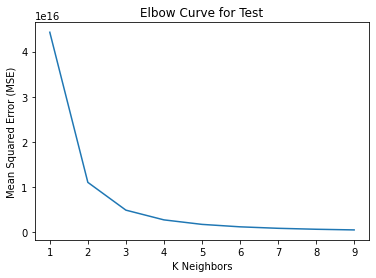

In [14]:
# Displays a graph of the value of k based on MSE
K = range(1, 10)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

In [15]:
# Improvise by applying the value of k that produces a minimum MSE
new_model  = KNN_Reg(n_neighbors = 3)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2*100, '\n',
      'Accuracy of old model (%):', acc1*100, '\n Improvement (%):', (acc2-acc1)*100)

 Accuracy of new model (%): -10831078999.075422 
 Accuracy of old model (%): -97444450964.79669 
 Improvement (%): 86613371965.72127


In [16]:
# Determine the prediction results
# Collections = ['primary_asset_contracts_dev_seller_fee_basis_points', 
#                'primary_asset_contracts_seller_fee_basis_points', 
#                'stats_total_sales', 'stats_total_supply']
stat_sales = np.array([[750,500,250]])
pred_old = model.predict(stat_sales)
pred_new = new_model.predict(stat_sales)

print(' Result Prediction Stat Total Sales Old Model: ', pred_old, '\n',
      'Result Prediction Stat Total Sales New Model: ', pred_new, )

 Result Prediction Stat Total Sales Old Model:  [49.] 
 Result Prediction Stat Total Sales New Model:  [271.66666667]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
